## Frame the Problem and look at the big picture

### Dataset

- **Dataset Name**: IBM HR Analytics Employee Attrition & Performance
- **Source**: [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)
- **Description**: This dataset is a fictional set created by IBM data scientists to understand the factors contributing to employee attrition and performance. It includes various attributes related to employees' personal and professional aspects.

### Features

| Hierarchy_Level                  | Education Levels | Environment Satisfaction | Job Involvement | Job Satisfaction | Performance Rating | Relationship Satisfaction | Work-Life Balance |
|--------------------------|------------------|---------------------------|-----------------|------------------|--------------------|----------------------------|-------------------|
| 1                  | Below College    | Low                       | Low             | Low              | Low                | Low                        | Bad               |
| 2                  | College          | Medium                    | Medium          | Medium           | Good               | Medium                     | Good              |
| 3                  | Bachelor         | High                      | High            | High             | Excellent          | High                       | Better            |
| 4                  | Master           | Very High                 | Very High       | Very High        | Outstanding        | Very High                  | Best              |
| 5                  | Doctor           | -                         | -               | -                | -                  | -                          | -                 |

### Project Objectives
1. Analyze Employee Attrition: Uncover key factors that lead to employee attrition.
2. Explore Job Roles and Distance from Home: Break down the distance from home by job role and attrition status.
3. Compare Income by Education and Attrition: Compare the average monthly income based on education level and attrition status.
4. Visualize Satisfaction and Performance Metrics: Visualize different satisfaction metrics and performance ratings across various employee demographics.

In [1]:
# Read libraries here
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score,confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve
import pickle
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Adjust width to fit the screen
pd.set_option('display.max_rows', None)  # Display all rows
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('Data\HR_Analytics.csv')
print(df.shape)

(1470, 35)


## Explore the Data

In [3]:
df1 = df.copy()
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
cols = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
df1.drop(columns=cols, inplace=True)

In [6]:
df1['Attrition']=df1['Attrition'] == 'Yes'

In [7]:
# Concatenate original DataFrame with dummy variables
df1 = pd.concat([df1, pd.get_dummies(df1[['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus']], drop_first=False)], axis=1)
# Drop original categorical columns if needed
df1.drop(['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus'], axis=1,inplace=True)

In [9]:
# Concatenate original DataFrame with dummy variables
df1 = pd.concat([df1, pd.get_dummies(df1[['Gender', 'OverTime']], drop_first=True)], axis=1)
# Drop original categorical columns if needed
df1.drop(['Gender','OverTime'], axis=1,inplace=True)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   bool 
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

In [ ]:
# Convert all boolean columns to integer
for col in df1.select_dtypes(include=['bool']).columns:
    df1[col] = df1[col].astype(int)

In [12]:
# droping columns which are highly correlated

cols = ["JobLevel", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]
df1.drop(columns=cols, inplace=True)

In [15]:
x = df1.drop(['Attrition'], axis=1)
y = df1[['Attrition']]

In [16]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Before Smoote" , y.value_counts())
print()
print("After Smoote" , y_smote.value_counts())

Before Smoote Attrition
False        1233
True          237
Name: count, dtype: int64

After Smoote Attrition
False        1233
True         1233
Name: count, dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [18]:
x_scaled = scaler.fit_transform(x_smote)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [20]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y_smote, test_size=0.2, random_state=42)

In [23]:
# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import os
from sklearn.base import ClassifierMixin
#from scikeras.wrappers import KerasClassifier


#for hypertuning
import optuna
from collections import Counter
from catboost import CatBoostError
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score # for Gini-mean
from sklearn.metrics import roc_curve

In [25]:
training_score = []
testing_score = []
precission = []
recall = []
Roc_Auc_score = []
f1_score_ = []

In [26]:
def model_prediction(models):
    # Initialize lists to store the performance metrics
    metrics = {
        'Model': [],
        'Train Accuracy': [],
        'Test Accuracy': [],
        'Precision': [],
        'Recall': [],
        'ROC AUC': [],
        'F1 Score': []
    }
    
    for model in models:
        # Fit the model
        model.fit(x_train1, y_train1)
        
        # Make predictions
        x_train_pred1 = model.predict(x_train1)
        x_test_pred1 = model.predict(x_test1)
        y_test_prob1 = model.predict_proba(x_test1)[:, 1]
        
        # Calculate metrics
        train_acc = accuracy_score(y_train1, x_train_pred1) * 100
        test_acc = accuracy_score(y_test1, x_test_pred1) * 100
        precision = precision_score(y_test1, x_test_pred1)
        recall = recall_score(y_test1, x_test_pred1)
        roc_auc = roc_auc_score(y_test1, y_test_prob1)
        f1 = f1_score(y_test1, x_test_pred1)
        
        # Append metrics to lists
        metrics['Model'].append(model.__class__.__name__)
        metrics['Train Accuracy'].append(train_acc)
        metrics['Test Accuracy'].append(test_acc)
        metrics['Precision'].append(precision)
        metrics['Recall'].append(recall)
        metrics['ROC AUC'].append(roc_auc)
        metrics['F1 Score'].append(f1)
        
        # Print metrics
        print("\n------------------------------------------------------------------------")
        print(f"Model: {model.__class__.__name__}")
        print(f"Accuracy Score on Training Data: {train_acc:.2f}%")
        print(f"Accuracy Score on Testing Data: {test_acc:.2f}%")
        print(f"Precision Score: {precision:.2f}")
        print(f"Recall Score: {recall:.2f}")
        print(f"ROC AUC Score: {roc_auc:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print("\nClassification Report:")
        print(classification_report(y_test1, x_test_pred1))
        
        # Plot confusion matrix
        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test1, x_test_pred1)
        plt.figure(figsize=(8, 4))
        sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
        plt.title(f'Confusion Matrix for {model.__class__.__name__}')
        plt.show()
        
        # Plot ROC Curve
        print("\nROC - AUC Curve:")
        fpr, tpr, _ = roc_curve(y_test1, y_test_prob1)
        plt.figure(figsize=(8, 4))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="green")
        plt.plot([0, 1], [0, 1], linestyle="--", color="black")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f'ROC Curve for {model.__class__.__name__}', pad=20, fontweight="black")
        plt.legend()
        plt.show()
    
    # Convert metrics dictionary to DataFrame
    metrics_df = pd.DataFrame(metrics)
    
    return metrics_df


------------------------------------------------------------------------
Accuracy_Score of LogisticRegression() model on Training Data is: 93.05273833671399
Accuracy_Score of LogisticRegression() model on Testing Data is: 92.3076923076923
Precision Score of LogisticRegression() model is: 0.9598214285714286
Recall Score of LogisticRegression() model is: 0.8811475409836066
ROC_AUC Score of LogisticRegression() model is: 0.9640491803278688
f1 Score of LogisticRegression() model is: 0.9188034188034188

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

       False       0.89      0.96      0.93       250
        True       0.96      0.88      0.92       244

    accuracy                           0.92       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.92      0.92       494


--------------------------------------

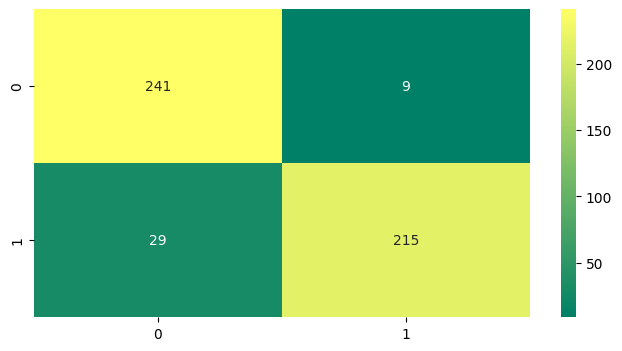


------------------------------------------------------------------------
ROC - AUC Curve of LogisticRegression() model is:


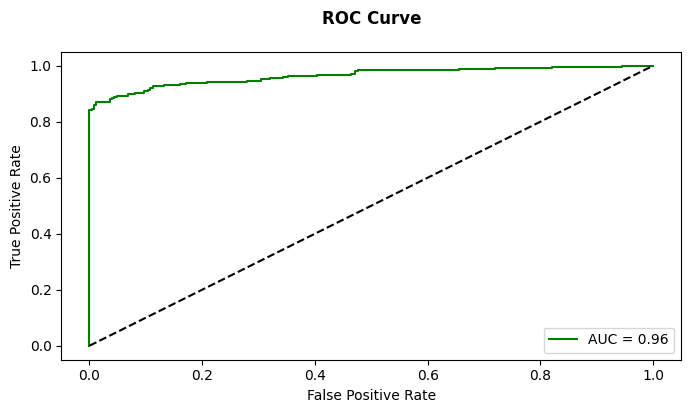

In [27]:
model_prediction(LogisticRegression())

  File "c:\Envs\ace_analytics_3124_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



------------------------------------------------------------------------
Accuracy_Score of KNeighborsClassifier() model on Training Data is: 94.47261663286004
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 91.90283400809717
Precision Score of KNeighborsClassifier() model is: 0.9047619047619048
Recall Score of KNeighborsClassifier() model is: 0.9344262295081968
ROC_AUC Score of KNeighborsClassifier() model is: 0.9747540983606557
f1 Score of KNeighborsClassifier() model is: 0.9193548387096774

------------------------------------------------------------------------
Classification Report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

       False       0.93      0.90      0.92       250
        True       0.90      0.93      0.92       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494


-----------------------

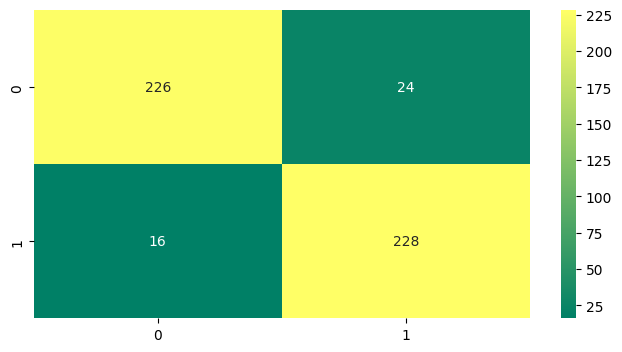


------------------------------------------------------------------------
ROC - AUC Curve of KNeighborsClassifier() model is:


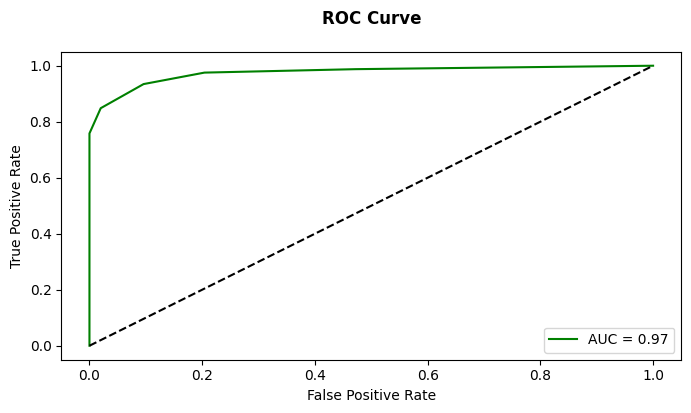

In [28]:
model_prediction(KNeighborsClassifier())


------------------------------------------------------------------------
Accuracy_Score of GaussianNB() model on Training Data is: 78.54969574036511
Accuracy_Score of GaussianNB() model on Testing Data is: 78.13765182186235
Precision Score of GaussianNB() model is: 0.7125
Recall Score of GaussianNB() model is: 0.9344262295081968
ROC_AUC Score of GaussianNB() model is: 0.9105245901639345
f1 Score of GaussianNB() model is: 0.8085106382978723

------------------------------------------------------------------------
Classification Report of GaussianNB() model is:
              precision    recall  f1-score   support

       False       0.91      0.63      0.75       250
        True       0.71      0.93      0.81       244

    accuracy                           0.78       494
   macro avg       0.81      0.78      0.78       494
weighted avg       0.81      0.78      0.78       494


------------------------------------------------------------------------
Confusion Matrix of GaussianNB()

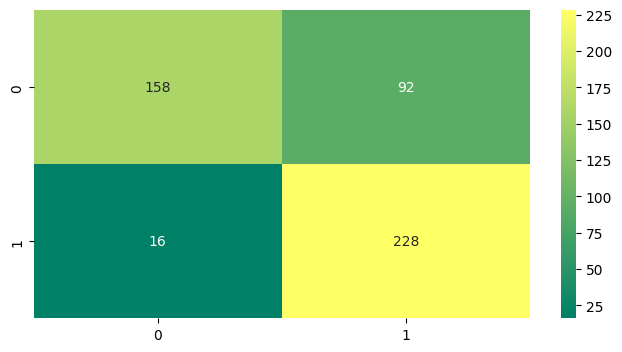


------------------------------------------------------------------------
ROC - AUC Curve of GaussianNB() model is:


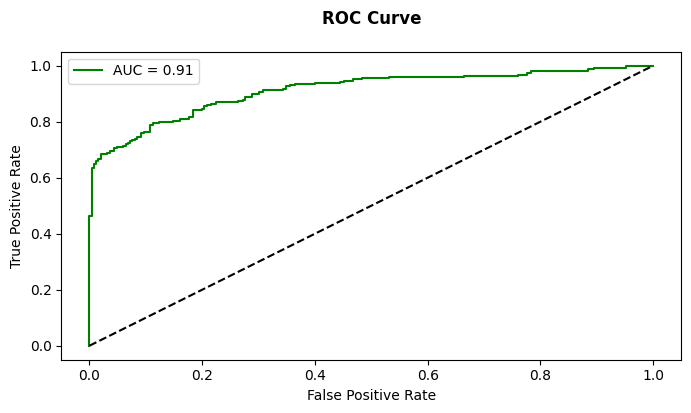

In [29]:
model_prediction(GaussianNB())

In [31]:
def model_prediction(models, x_train1, y_train1, x_test1, y_test1):
    # Initialize lists to store the performance metrics
    metrics = {
        'Model': [],
        'Train Accuracy': [],
        'Test Accuracy': [],
        'Precision': [],
        'Recall': [],
        'ROC AUC': [],
        'F1 Score': []
    }
    
    best_model = None
    best_test_acc = 0
    
    for model in models:
        # Fit the model
        model.fit(x_train1, y_train1)
        
        # Make predictions
        x_train_pred1 = model.predict(x_train1)
        x_test_pred1 = model.predict(x_test1)
        y_test_prob1 = model.predict_proba(x_test1)[:, 1]
        
        # Calculate metrics
        train_acc = accuracy_score(y_train1, x_train_pred1) * 100
        test_acc = accuracy_score(y_test1, x_test_pred1) * 100
        precision = precision_score(y_test1, x_test_pred1)
        recall = recall_score(y_test1, x_test_pred1)
        roc_auc = roc_auc_score(y_test1, y_test_prob1)
        f1 = f1_score(y_test1, x_test_pred1)
        
        # Append metrics to lists
        metrics['Model'].append(model.__class__.__name__)
        metrics['Train Accuracy'].append(train_acc)
        metrics['Test Accuracy'].append(test_acc)
        metrics['Precision'].append(precision)
        metrics['Recall'].append(recall)
        metrics['ROC AUC'].append(roc_auc)
        metrics['F1 Score'].append(f1)
        
        # Check if this model is the best model
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_model = model
        
        # Print metrics
        print("\n------------------------------------------------------------------------")
        print(f"Model: {model.__class__.__name__}")
        print(f"Accuracy Score on Training Data: {train_acc:.2f}%")
        print(f"Accuracy Score on Testing Data: {test_acc:.2f}%")
        print(f"Precision Score: {precision:.2f}")
        print(f"Recall Score: {recall:.2f}")
        print(f"ROC AUC Score: {roc_auc:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print("\nClassification Report:")
        print(classification_report(y_test1, x_test_pred1))
        
        # Plot confusion matrix
        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test1, x_test_pred1)
        plt.figure(figsize=(8, 4))
        sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
        plt.title(f'Confusion Matrix for {model.__class__.__name__}')
        plt.show()
        
        # Plot ROC Curve
        print("\nROC - AUC Curve:")
        fpr, tpr, _ = roc_curve(y_test1, y_test_prob1)
        plt.figure(figsize=(8, 4))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="green")
        plt.plot([0, 1], [0, 1], linestyle="--", color="black")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f'ROC Curve for {model.__class__.__name__}', pad=20, fontweight="black")
        plt.legend()
        plt.show()
    
    # Convert metrics dictionary to DataFrame
    metrics_df = pd.DataFrame(metrics)
    
    # Save the best model to a pickle file
    with open('predict_attrition.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    
    return metrics_df


------------------------------------------------------------------------
Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 81.57894736842105
Precision Score of DecisionTreeClassifier() model is: 0.8
Recall Score of DecisionTreeClassifier() model is: 0.8360655737704918
AUC Score of DecisionTreeClassifier() model is: 0.8160327868852459

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

       False       0.83      0.80      0.81       250
        True       0.80      0.84      0.82       244

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494


------------------------------------------------------------------------
Confusion Matrix of DecisionTreeC

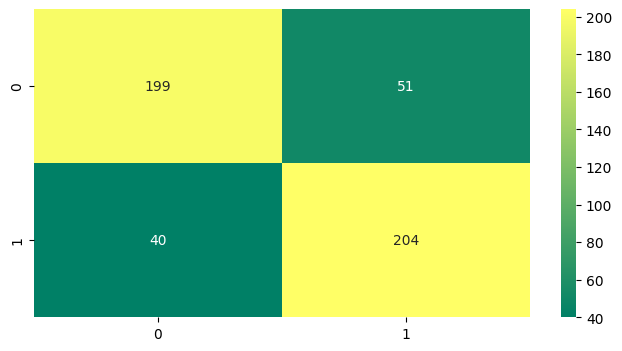


------------------------------------------------------------------------
ROC - AUC Curve of DecisionTreeClassifier() model is:


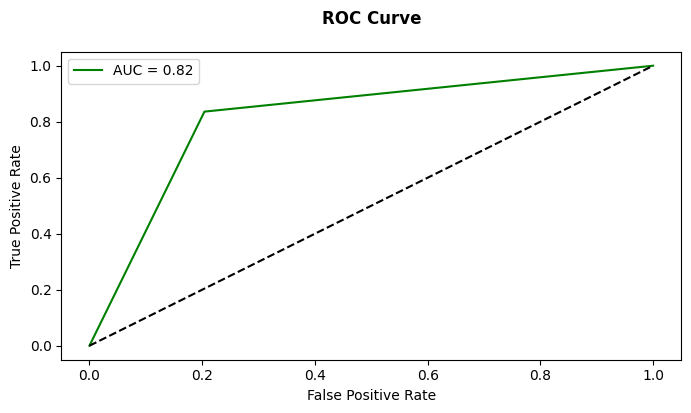

In [32]:
model_prediction(DecisionTreeClassifier())


------------------------------------------------------------------------
Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 92.3076923076923
Precision Score of RandomForestClassifier() model is: 0.9681818181818181
Recall Score of RandomForestClassifier() model is: 0.8729508196721312
AUC Score of RandomForestClassifier() model is: 0.9684508196721312

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

       False       0.89      0.97      0.93       250
        True       0.97      0.87      0.92       244

    accuracy                           0.92       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.92      0.92       494


------------------------------------------------------------------------
Confusion Matrix of

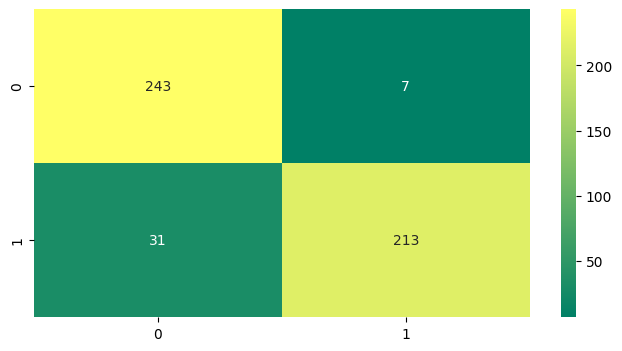


------------------------------------------------------------------------
ROC - AUC Curve of RandomForestClassifier() model is:


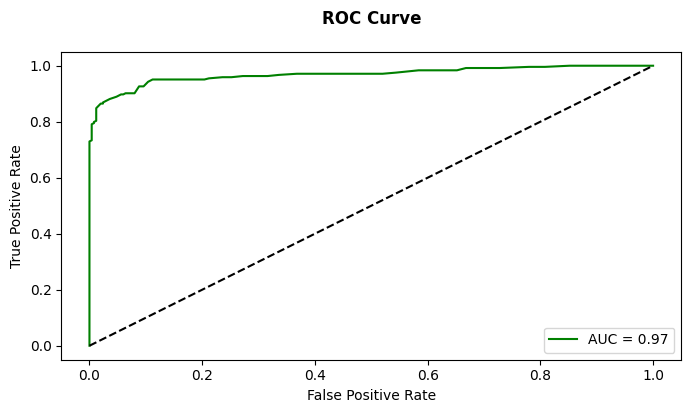

In [33]:
model_prediction(RandomForestClassifier())


------------------------------------------------------------------------
Accuracy_Score of AdaBoostClassifier() model on Training Data is: 91.78498985801217
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 86.8421052631579
Precision Score of AdaBoostClassifier() model is: 0.8776371308016878
Recall Score of AdaBoostClassifier() model is: 0.8524590163934426
AUC Score of AdaBoostClassifier() model is: 0.9380081967213114

------------------------------------------------------------------------
Classification Report of AdaBoostClassifier() model is:
              precision    recall  f1-score   support

       False       0.86      0.88      0.87       250
        True       0.88      0.85      0.86       244

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494


------------------------------------------------------------------------
Confusion Matrix of AdaBoostCla

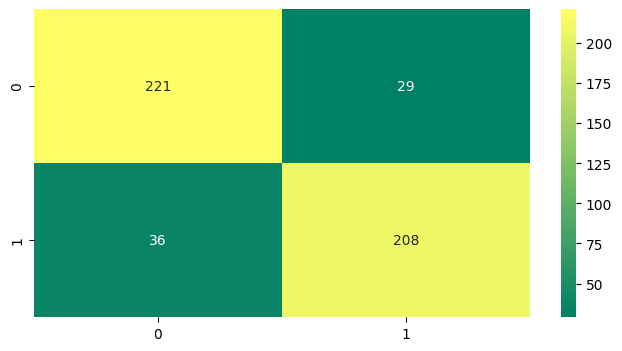


------------------------------------------------------------------------
ROC - AUC Curve of AdaBoostClassifier() model is:


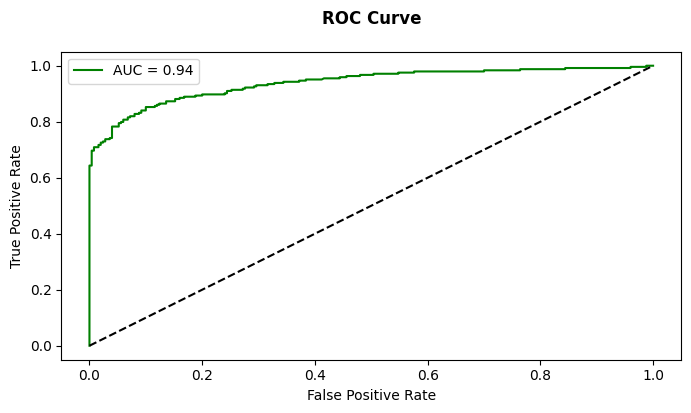

In [34]:
model_prediction(AdaBoostClassifier())


------------------------------------------------------------------------
Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 96.39959432048681
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 90.2834008097166
Precision Score of GradientBoostingClassifier() model is: 0.9336283185840708
Recall Score of GradientBoostingClassifier() model is: 0.8647540983606558
AUC Score of GradientBoostingClassifier() model is: 0.9555081967213116

------------------------------------------------------------------------
Classification Report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

       False       0.88      0.94      0.91       250
        True       0.93      0.86      0.90       244

    accuracy                           0.90       494
   macro avg       0.91      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494


--------------------------------------------------------

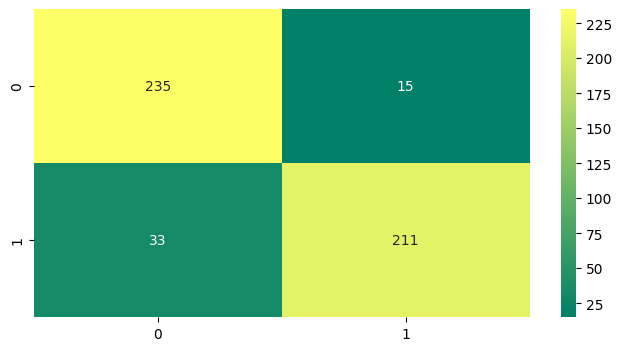


------------------------------------------------------------------------
ROC - AUC Curve of GradientBoostingClassifier() model is:


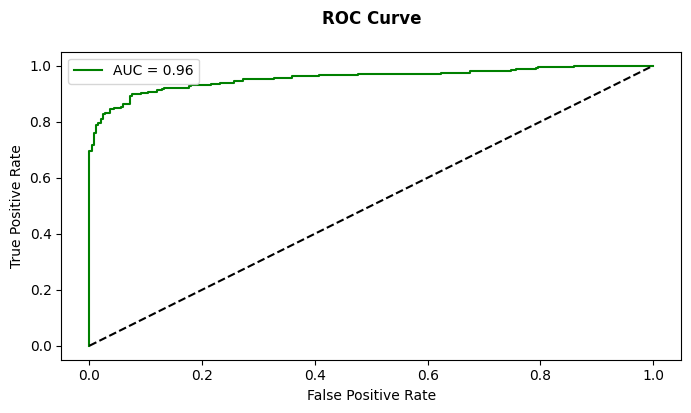

In [35]:
model_prediction(GradientBoostingClassifier())


------------------------------------------------------------------------
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, 

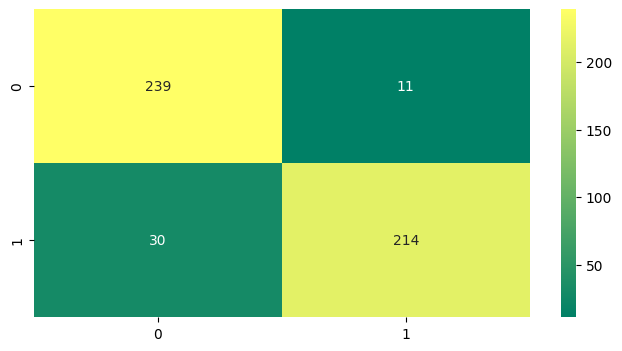


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model is:


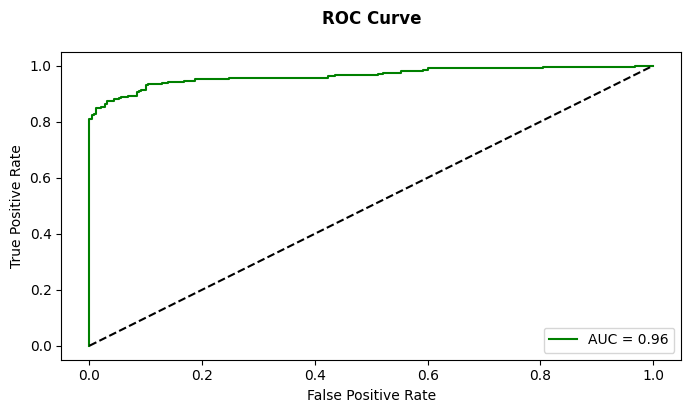

In [36]:
model_prediction(XGBClassifier())

Learning rate set to 0.013768
0:	learn: 0.6849368	total: 154ms	remaining: 2m 34s
1:	learn: 0.6768172	total: 157ms	remaining: 1m 18s
2:	learn: 0.6695112	total: 160ms	remaining: 53.2s
3:	learn: 0.6608484	total: 163ms	remaining: 40.7s
4:	learn: 0.6534828	total: 167ms	remaining: 33.2s
5:	learn: 0.6466056	total: 170ms	remaining: 28.2s
6:	learn: 0.6383965	total: 174ms	remaining: 24.7s
7:	learn: 0.6315030	total: 177ms	remaining: 21.9s
8:	learn: 0.6259262	total: 180ms	remaining: 19.8s
9:	learn: 0.6195793	total: 183ms	remaining: 18.1s
10:	learn: 0.6134263	total: 187ms	remaining: 16.8s
11:	learn: 0.6081370	total: 190ms	remaining: 15.6s
12:	learn: 0.6013047	total: 194ms	remaining: 14.7s
13:	learn: 0.5937701	total: 197ms	remaining: 13.9s
14:	learn: 0.5873678	total: 200ms	remaining: 13.1s
15:	learn: 0.5778625	total: 203ms	remaining: 12.5s
16:	learn: 0.5723965	total: 206ms	remaining: 11.9s
17:	learn: 0.5637286	total: 209ms	remaining: 11.4s
18:	learn: 0.5591361	total: 212ms	remaining: 11s
19:	learn: 

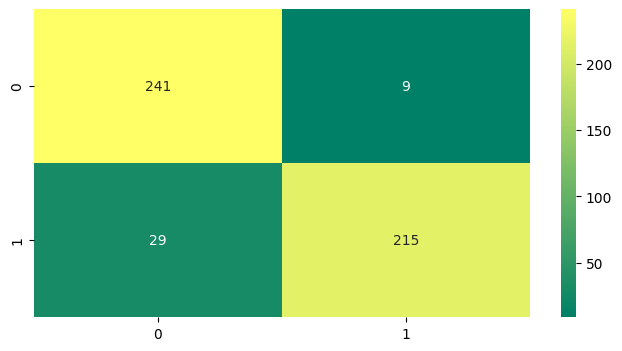


------------------------------------------------------------------------
ROC - AUC Curve of <catboost.core.CatBoostClassifier object at 0x000001C0F8E96D20> model is:


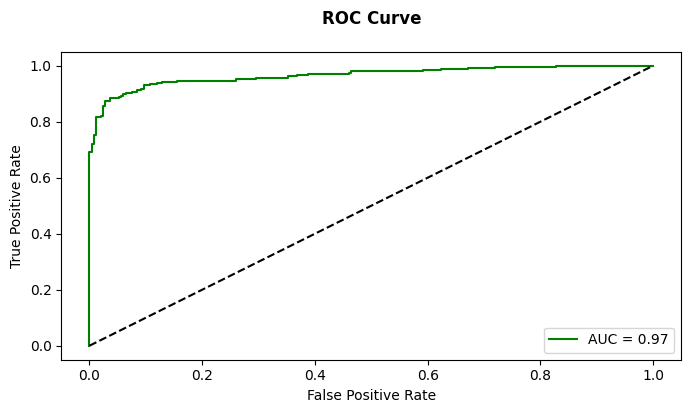

In [37]:
model_prediction(CatBoostClassifier())